<a href="https://colab.research.google.com/github/AAA123404/Financial-big-data-analysis/blob/main/week6%E4%BD%9C%E6%A5%AD_%E9%87%8F%E5%8C%96%E4%BA%A4%E6%98%93%E7%AD%96%E7%95%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1. 使用Python設計一個量化交易策略，並使用歷史資料進行回測。

##均線回歸策略

[*********************100%***********************]  1 of 1 completed


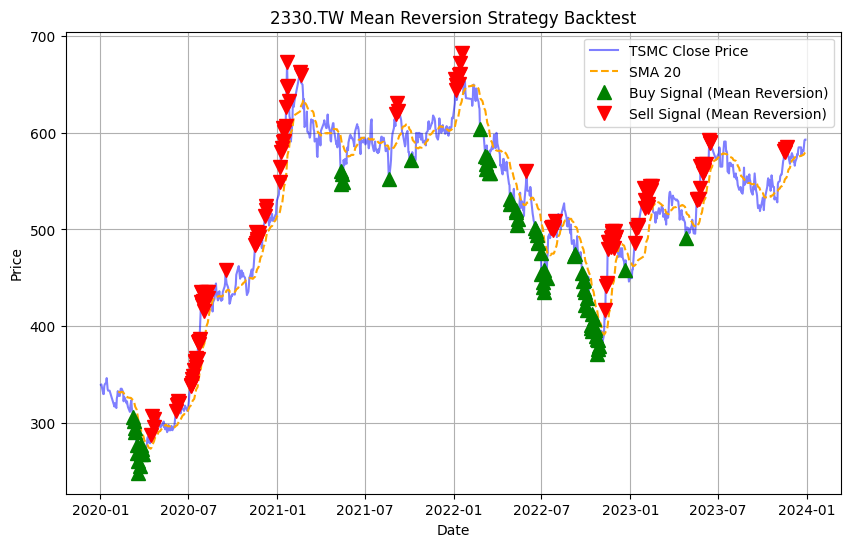

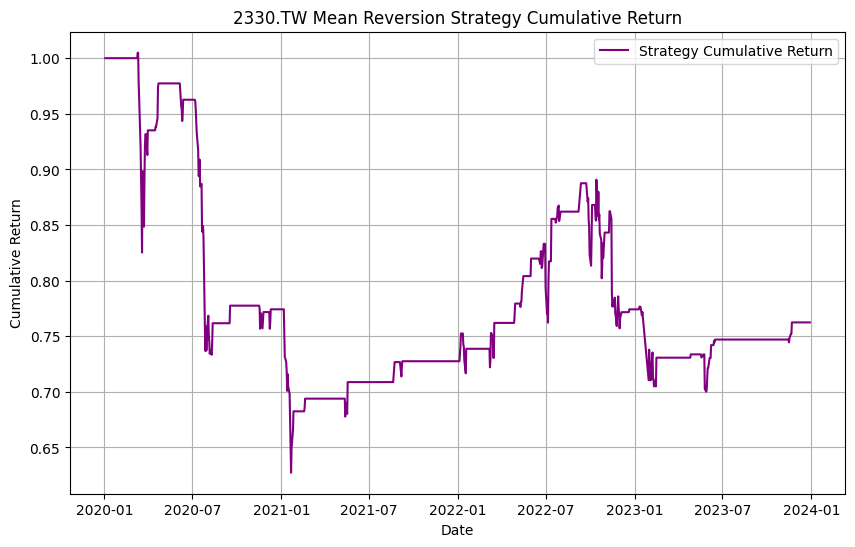

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

stock_id = "2330.TW"
df = yf.download(stock_id, start="2020-01-01", end="2024-01-01")
# 20日移動均線
df['SMA20'] = df['Close'].rolling(window=20).mean()

# 設定均值回歸信號 設定 95% 和 105% 的目的是為了確定價格偏離其移動平均線的程度
df['Signal'] = np.where(df['Close'] < df['SMA20'] * 0.95, 1,   # 超賣信號，買入
        np.where(df['Close'] > df['SMA20'] * 1.05, -1, 0))# 超買信號，賣出

# 計算每日回報率
df['Daily Return'] = df['Close'].pct_change() #(Current Value−Previous Value)/Previous Value *100
# 計算策略回報率
df['Strategy Return'] = df['Daily Return'] * df['Signal'].shift(1)
# 計算策略累積回報
df['Cumulative Return'] = (1 + df['Strategy Return']).cumprod()

# 收盤價格及均值回歸信號
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='TSMC Close Price', color='blue', alpha=0.5)
plt.plot(df.index, df['SMA20'], label='SMA 20', color='orange', linestyle='--')

# 標註買賣信號
plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal (Mean Reversion)')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal (Mean Reversion)')

plt.title(f'{stock_id} Mean Reversion Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid()
plt.show()

# 策略累積回報
plt.figure(figsize=(10, 6))
plt.plot(df['Cumulative Return'], label='Strategy Cumulative Return', color='purple')
plt.title(f'{stock_id} Mean Reversion Strategy Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='best')
plt.grid()
plt.show()


[*********************100%***********************]  1 of 1 completed


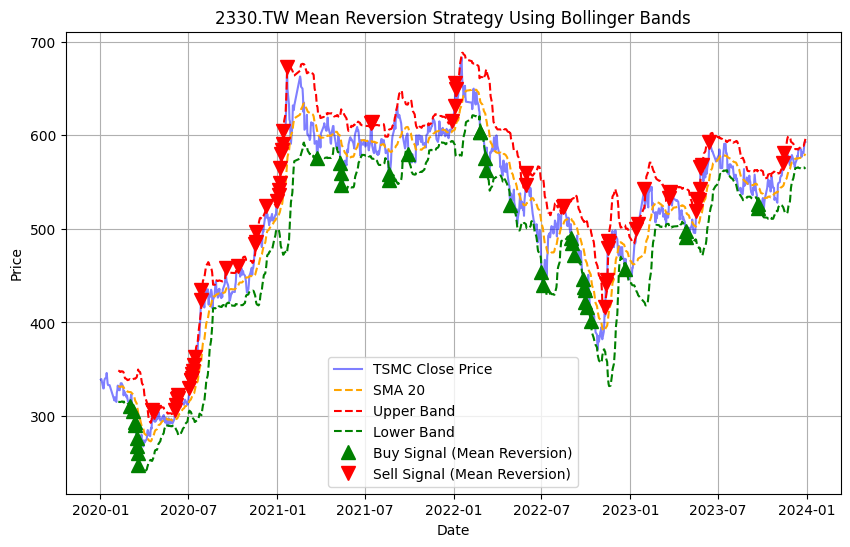

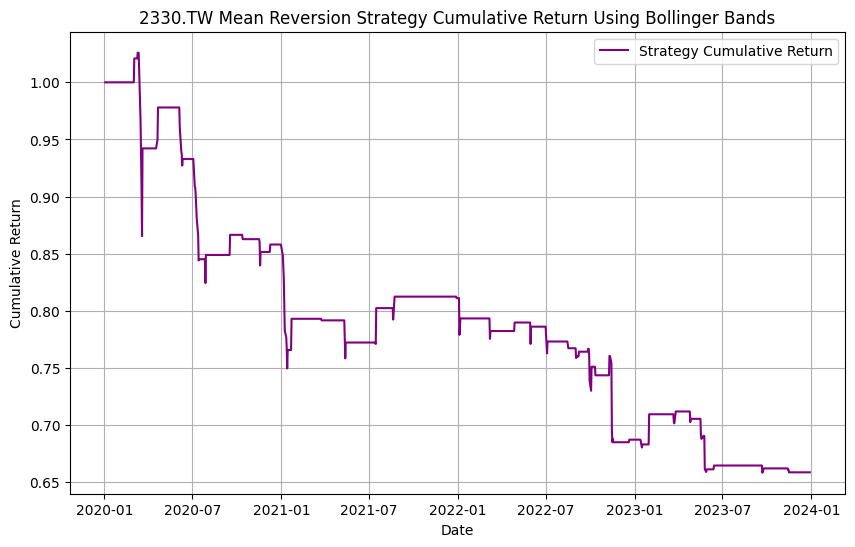

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
stock_id = "2330.TW"
df = yf.download(stock_id, start="2020-01-01", end="2024-01-01")

# 計算20日移動平均
df['SMA20'] = df['Close'].rolling(window=20).mean()
# 計算20日標準差
df['STD20'] = df['Close'].rolling(window=20).std()
# 計算上下布林帶
df['Upper Band'] = df['SMA20'] + (df['STD20'] * 2)
df['Lower Band'] = df['SMA20'] - (df['STD20'] * 2)

# 設定交易信號
df['Signal'] = np.where(df['Close'] < df['Lower Band'], 1,  # 超賣信號，買入
                        np.where(df['Close'] > df['Upper Band'], -1, 0))  # 超買信號，賣出
# 計算每日回報率
df['Daily Return'] = df['Close'].pct_change()
# 計算策略回報率
df['Strategy Return'] = df['Daily Return'] * df['Signal'].shift(1)
# 計算策略累積回報
df['Cumulative Return'] = (1 + df['Strategy Return']).cumprod()

# 收盤價格及布林帶
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='TSMC Close Price', color='blue', alpha=0.5)
plt.plot(df.index, df['SMA20'], label='SMA 20', color='orange', linestyle='--')
plt.plot(df.index, df['Upper Band'], label='Upper Band', color='red', linestyle='--')
plt.plot(df.index, df['Lower Band'], label='Lower Band', color='green', linestyle='--')

# 標註買賣信號
plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal (Mean Reversion)')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal (Mean Reversion)')

plt.title(f'{stock_id} Mean Reversion Strategy Using Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid()
plt.show()

# 策略累積回報
plt.figure(figsize=(10, 6))
plt.plot(df['Cumulative Return'], label='Strategy Cumulative Return', color='purple')
plt.title(f'{stock_id} Mean Reversion Strategy Cumulative Return Using Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='best')
plt.grid()
plt.show()


##動量策略

[*********************100%***********************]  1 of 1 completed


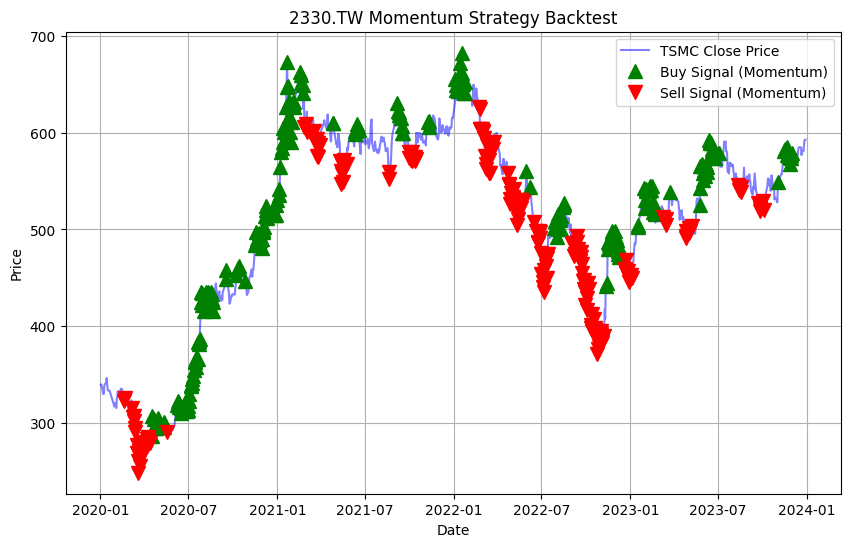

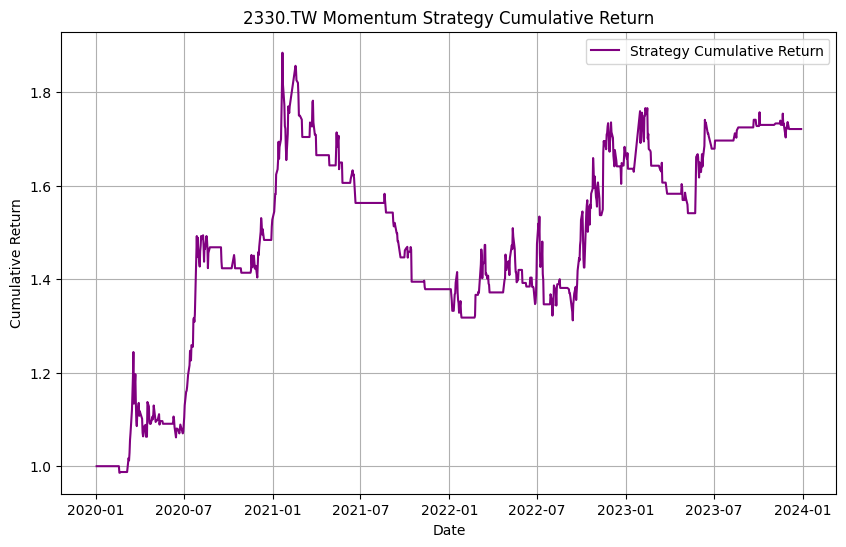

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
stock_id = "2330.TW"
df = yf.download(stock_id, start="2020-01-01", end="2024-01-01")

# 計算20日動量
df['Momentum'] = df['Close'].pct_change(periods=20)

# 設定動量交易信號
momentum_threshold = 0.05  # 設定閾值，超過 5% 為上升趨勢，低於 -5% 為下降趨勢
df['Signal'] = np.where(df['Momentum'] > momentum_threshold, 1,  # 動量大於閾值，買入
                        np.where(df['Momentum'] < -momentum_threshold, -1, 0))  # 動量小於負閾值，賣出

# 計算每日回報率
df['Daily Return'] = df['Close'].pct_change()
# 計算策略回報率
df['Strategy Return'] = df['Daily Return'] * df['Signal'].shift(1)
# 計算策略累積回報
df['Cumulative Return'] = (1 + df['Strategy Return']).cumprod()

# 收盤價格及動量信號
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='TSMC Close Price', color='blue', alpha=0.5)

# 標註買賣信號
plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal (Momentum)')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal (Momentum)')

plt.title(f'{stock_id} Momentum Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid()
plt.show()

# 策略累積回報
plt.figure(figsize=(10, 6))
plt.plot(df['Cumulative Return'], label='Strategy Cumulative Return', color='purple')
plt.title(f'{stock_id} Momentum Strategy Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='best')
plt.grid()
plt.show()


##均線交叉策略

[*********************100%***********************]  1 of 1 completed
<ipython-input-1-8c11ee4da455>:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Signal'][20:] = np.where(df['SMA20'][20:] > df['SMA50'][20:], 1, -1)  # 1 表示買入, -1 表示賣出

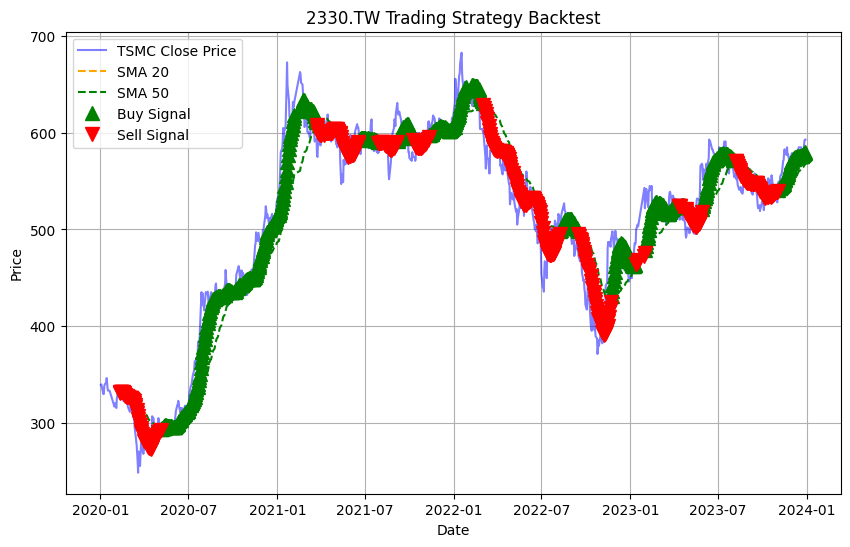

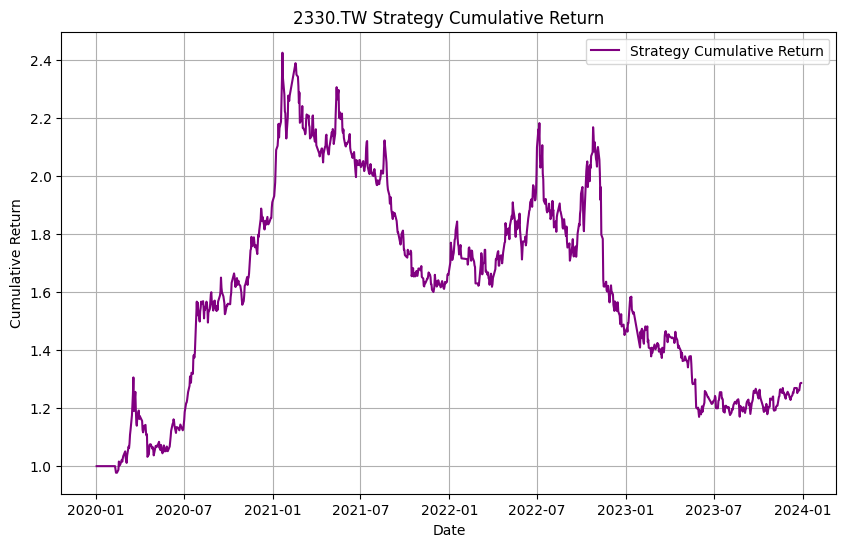

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

stock_id = "2330.TW"
df = yf.download(stock_id, start="2020-01-01", end="2024-01-01")

# 計算短期和長期均線
df['SMA20'] = df['Close'].rolling(window=20).mean()  # 20日均線
df['SMA50'] = df['Close'].rolling(window=50).mean()  # 50日均線

# 設計交易信號
df['Signal'] = 0
df['Signal'][20:] = np.where(df['SMA20'][20:] > df['SMA50'][20:], 1, -1)  # 1 表示買入, -1 表示賣出

# 計算每日回報率
df['Daily Return'] = df['Close'].pct_change()
# 計算策略回報率
df['Strategy Return'] = df['Daily Return'] * df['Signal'].shift(1)
# 計算累積回報
df['Cumulative Return'] = (1 + df['Strategy Return']).cumprod()

# 可視化
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='TSMC Close Price', color='blue', alpha=0.5)
plt.plot(df.index, df['SMA20'], label='SMA 20', color='orange', linestyle='--')
plt.plot(df.index, df['SMA50'], label='SMA 50', color='green', linestyle='--')

# 標註買賣信號
plt.plot(df[df['Signal'] == 1].index, df['SMA20'][df['Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['SMA20'][df['Signal'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title(f'{stock_id} Trading Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid()
plt.show()

# 繪製策略累積回報
plt.figure(figsize=(10, 6))
plt.plot(df['Cumulative Return'], label='Strategy Cumulative Return', color='purple')
plt.title(f'{stock_id} Strategy Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='best')
plt.grid()
plt.show()


##使用 Backtrader 實現動量策略

In [1]:
pip install backtrader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 6.3 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


初始資金: 100000.00
回測後的資金: 100250.00
夏普比率: -9.89
最大回撤: -0.24%


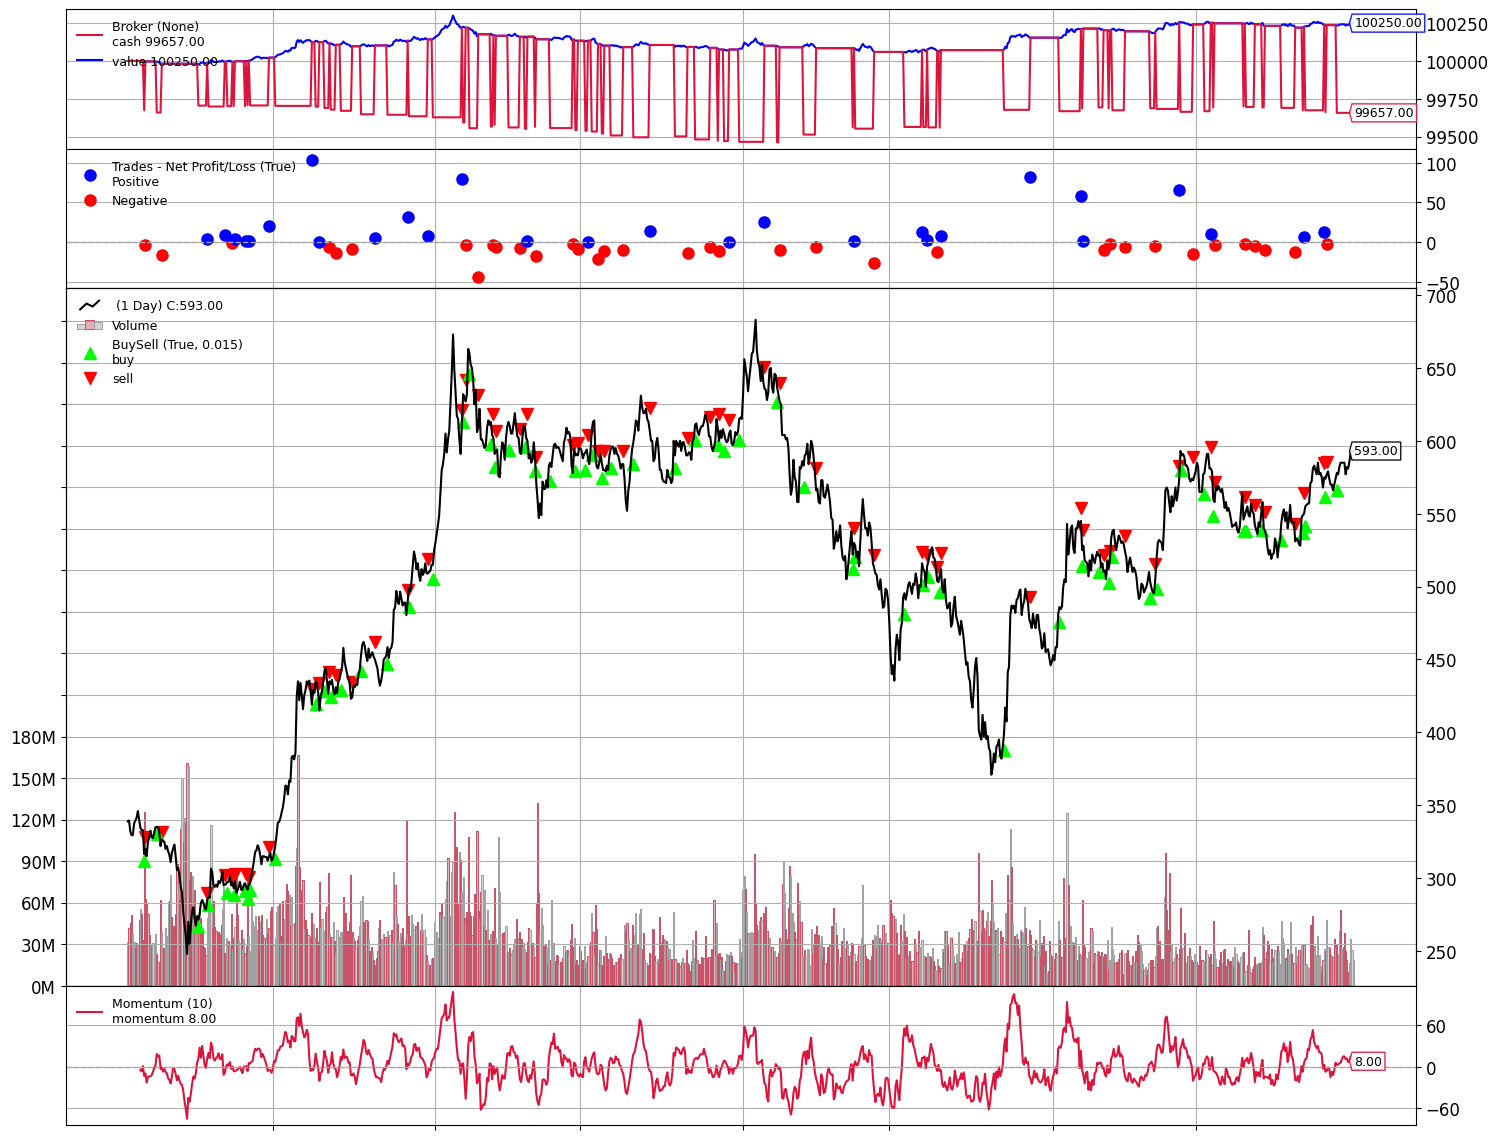

In [3]:
import backtrader as bt
import yfinance as yf
import pandas as pd
import numpy as np

# 使用 yfinance 下載 AAPL 的數據
data = yf.download('2330.TW', start='2020-01-01', end='2024-01-01')

# 將數據轉換為 backtrader 可以使用的格式
data_bt = bt.feeds.PandasData(dataname=data)

# 建立動量策略類別
class MomentumStrategy(bt.Strategy):
    params = (('period', 10),)

    def __init__(self):
        self.momentum = bt.indicators.Momentum(self.data.close, period=self.params.period)
        self.starting_value = self.broker.getvalue()
        self.daily_values = []  # 用於儲存每日資產價值

    def next(self):
        if not self.position:  # 如果沒有持倉
            if self.momentum[0] > 0:  # 動量指標大於0，表示上升趨勢
                self.buy()
        elif self.momentum[0] <= 0:  # 動量指標小於等於0，表示下降趨勢
            self.sell()

        # 每次更新時記錄當天的資產價值
        self.daily_values.append(self.broker.getvalue())

# 設定回測環境
cerebro = bt.Cerebro()
cerebro.addstrategy(MomentumStrategy)

# 添加數據到 backtrader
cerebro.adddata(data_bt)

# 設定初始資金
cerebro.broker.setcash(100000)

# 執行回測
print(f'初始資金: {cerebro.broker.getvalue():.2f}')
results = cerebro.run()
print(f'回測後的資金: {cerebro.broker.getvalue():.2f}')

# 取得策略結果
strategy = results[0]

# 計算每日收益率
portfolio_values = pd.Series(strategy.daily_values)
returns = portfolio_values.pct_change().dropna()

# 計算年化夏普比率
annual_return = returns.mean() * 252
annual_volatility = returns.std() * np.sqrt(252)
risk_free_rate = 0.01  # 無風險利率設為1%
sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility

# 計算最大回撤
cumulative_returns = (1 + returns).cumprod()
drawdown = cumulative_returns / cumulative_returns.cummax() - 1
max_drawdown = drawdown.min()

print(f'夏普比率: {sharpe_ratio:.2f}')
print(f'最大回撤: {max_drawdown:.2%}')

# 繪製圖表
## 如果在 local machine python terminal 之上:
# cerebro.plot()

## 如果在 Colab 之上:
#https://www.roelpeters.be/how-to-use-backtrader-plots-in-python-notebooks/
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams.update({'font.size': 12})
img = cerebro.plot(iplot = False)
img[0][0].savefig('backtrader_momentum.png')

##使用 Backtrader 實現均值回歸策略


[*********************100%***********************]  1 of 1 completed


初始資金: 100000.00
回測後的資金: 100250.00
夏普比率: -9.89
最大回撤: -0.24%


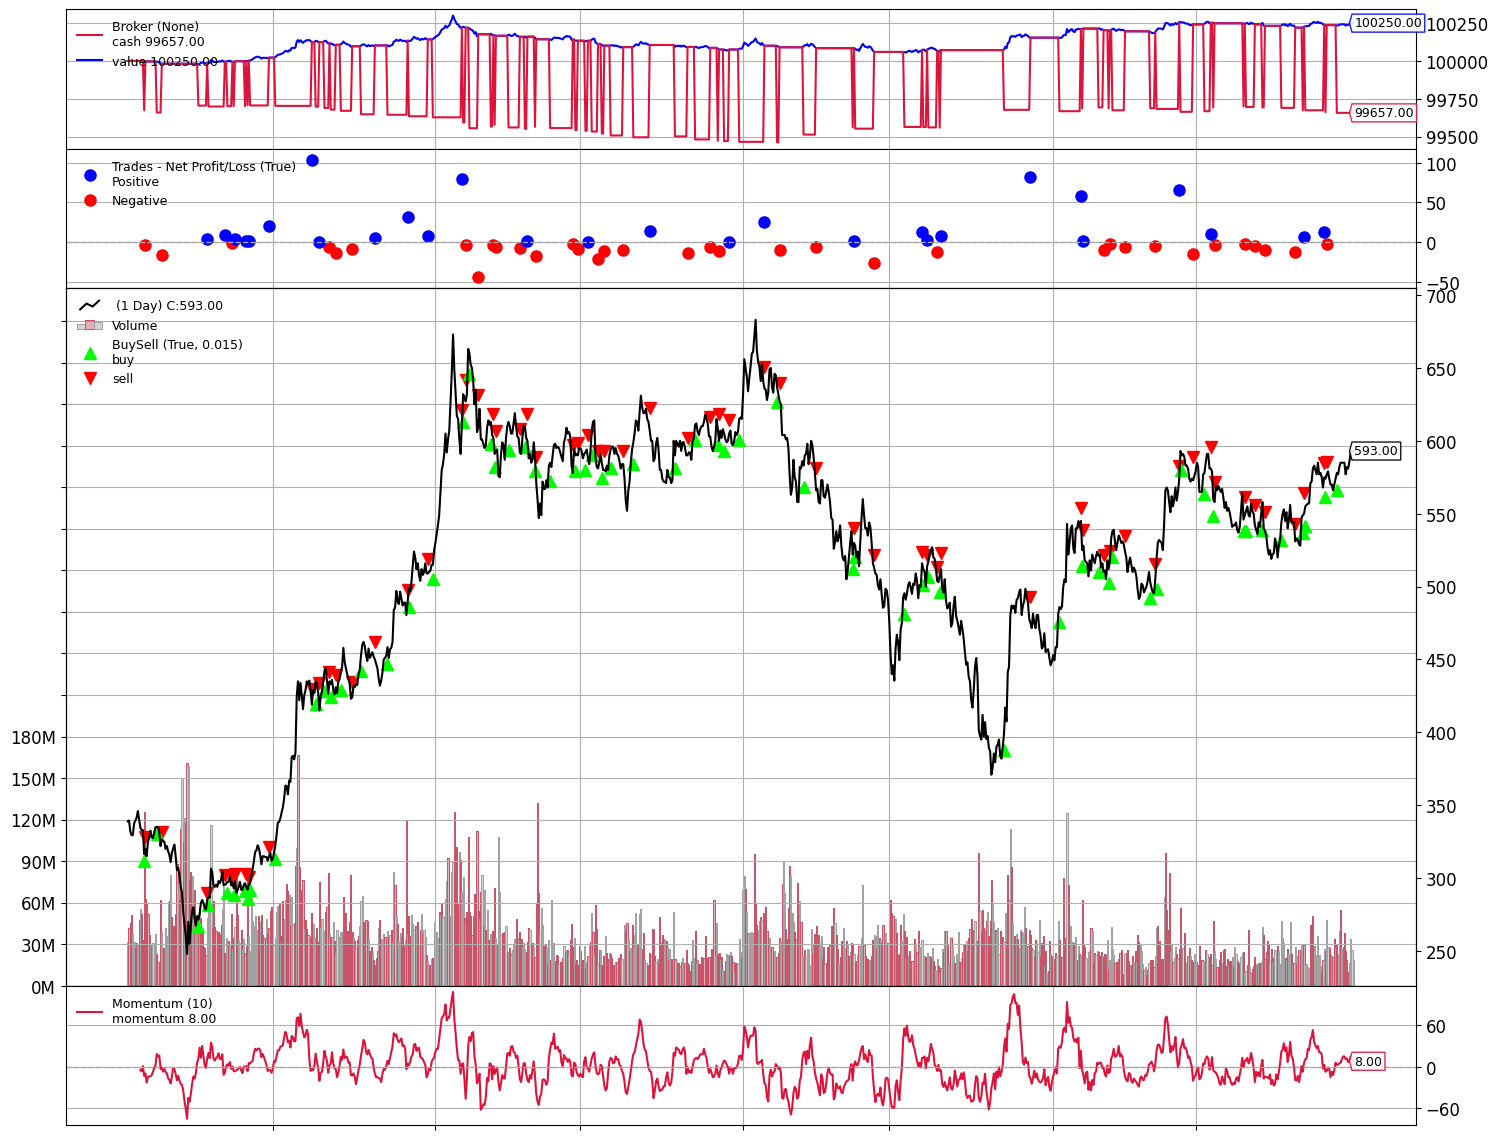

In [5]:
import backtrader as bt
import yfinance as yf
import pandas as pd
import numpy as np

# 使用 yfinance 下載 AAPL 的數據
data = yf.download('2330.TW', start='2020-01-01', end='2024-01-01')

# 將數據轉換為 backtrader 可以使用的格式
data_bt = bt.feeds.PandasData(dataname=data)

#均值回歸策略
class MeanReversionStrategy(bt.Strategy):
    params = (('period', 20), ('zscore_entry', 1), ('zscore_exit', 0))

    def __init__(self):
        self.moving_avg = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.period)
        self.stddev = bt.indicators.StandardDeviation(self.data.close, period=self.params.period)
        self.zscore = (self.data.close - self.moving_avg) / self.stddev
        self.daily_values = []  # 用於儲存每日資產價值

    def next(self):
        if self.zscore[0] < -self.params.zscore_entry and not self.position:
            self.buy()
        elif self.zscore[0] > self.params.zscore_exit and self.position:
            self.sell()

        # 每次更新時記錄當天的資產價值
        self.daily_values.append(self.broker.getvalue())

# 設定回測環境
cerebro = bt.Cerebro()
cerebro.addstrategy(MomentumStrategy)

# 添加數據到 backtrader
cerebro.adddata(data_bt)

# 設定初始資金
cerebro.broker.setcash(100000)

# 執行回測
print(f'初始資金: {cerebro.broker.getvalue():.2f}')
results = cerebro.run()
print(f'回測後的資金: {cerebro.broker.getvalue():.2f}')

# 取得策略結果
strategy = results[0]

# 計算每日收益率
portfolio_values = pd.Series(strategy.daily_values)
returns = portfolio_values.pct_change().dropna()

# 計算年化夏普比率
annual_return = returns.mean() * 252
annual_volatility = returns.std() * np.sqrt(252)
risk_free_rate = 0.01  # 無風險利率設為1%
sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility

# 計算最大回撤
cumulative_returns = (1 + returns).cumprod()
drawdown = cumulative_returns / cumulative_returns.cummax() - 1
max_drawdown = drawdown.min()

print(f'夏普比率: {sharpe_ratio:.2f}')
print(f'最大回撤: {max_drawdown:.2%}')

# 繪製圖表
## 如果在 local machine python terminal 之上:
# cerebro.plot()

## 如果在 Colab 之上:
#https://www.roelpeters.be/how-to-use-backtrader-plots-in-python-notebooks/
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams.update({'font.size': 12})
img = cerebro.plot(iplot = False)
img[0][0].savefig('backtrader_momentum.png')